# myrun

This notebook imports the feature vector, merges it with the labelled data and then makes predictions on specified columns


In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce

# Igel
from igel import Igel

# Compare Algorithms
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def clean_dataset(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(np.nan,0)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df = df.replace(r'\D+', '', regex=True)
    return df
    #return df[indices_to_keep].astype(np.float64)


def clean_dataset_int(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(np.nan,0)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    df = df.replace(r'\D+', '', regex=True)
    return df[indices_to_keep].astype(np.float64)

In [3]:
# Set the column names
feature_vector_keys = ["timestamp", #0
                       "tweet_id",  
                       "positive_sentiment", 
                       "negative_sentiment", 
                       "numb_of_mentions", 
                       "numb_of_media",
                       "numb_of_urls", 
                       "numb_of_hashtags", 
                       "numb_of_personal_pronouns", 
                       "numb_of_present_tenses", 
                       "numb_of_past_tenses", #10 
                       #"sent_from_web",
                       "numb_of_named_entites",
                       "numb_of_weird_chars", 
                       "numb_of_questions", 
                       "numb_of_emoticons", 
                       "numb_of_swearing_words", 
                       "numb_of_slang_words", 
                       "numb_of_intensifiers", 
                       "tweet_length", 
                       "userFollowersCount",
                       "userFriendsCount", #20
                       "user_numb_of_tweets",
                       "user_list_count",
                       #"tfidf_fire",                      # old
                       "dict_precision",                  # measures against the keyword TFIDF
                       "dict_recall", 
                       "dict_f_measure",
                       "offset",
                       "weighted_length", # the overall length of the Tweet with code points weighted per the ranges
                       "permillage", # (indicates the proportion (per thousand) of the weighted length in comparison to the max weighted length.
                       "is_verified", # column 29  #30 Non-word-embedding-features (0-29)
                       "unknown1",
                       "unknown2",
                       "unknown3",
                       "wEmbed1",
                       "wEmbed2",
                       "wEmbed3",
                       "wEmbed4",
                       "wEmbed5",
                       "wEmbed6",
                       "wEmbed7",
                       "wEmbed8",
                       "wEmbed9",
                       "wEmbed10",
                       "wEmbed11",
                       "wEmbed12",
                       "wEmbed13",
                       "wEmbed14",
                       "wEmbed15",
                       "wEmbed16",
                       "wEmbed17",
                       "wEmbed18",
                       "wEmbed19",
                       "wEmbed20",
                       "wEmbed21",
                       "wEmbed22",
                       "wEmbed23",
                       "wEmbed24",
                       "wEmbed25",
                       "wEmbed26",
                       "wEmbed27",
                       "wEmbed28",
                       "wEmbed29",
                       "wEmbed30",
                       "wEmbed31",
                       "wEmbed32",
                       "wEmbed33",
                       "wEmbed34",
                       "wEmbed35",
                       "wEmbed36",
                       "wEmbed37",
                       "wEmbed38",
                       "wEmbed39",
                       "wEmbed40",
                       "wEmbed41",
                       "wEmbed42",
                       "wEmbed43",
                       "wEmbed44",
                       "wEmbed45",
                       "wEmbed46",
                       "wEmbed47",
                       "wEmbed48",
                       "wEmbed49",
                       "wEmbed51",
                       "wEmbed52",
                       "wEmbed53",
                       "wEmbed54",
                       "wEmbed55",
                       "wEmbed56",
                       "wEmbed57",
                       "wEmbed58",
                       "wEmbed59",
                       "wEmbed60",
                       "wEmbed61",
                       "wEmbed62",
                       "wEmbed63",
                       "wEmbed64",
                       "wEmbed65",
                       "wEmbed66",
                       "wEmbed67",
                       "wEmbed68",
                       "wEmbed69",
                       "wEmbed70",
                       "wEmbed71",
                       "wEmbed72",
                       "wEmbed73",
                       "wEmbed74",
                       "wEmbed75",
                       "wEmbed76",
                       "wEmbed77",
                       "wEmbed78",
                       "wEmbed79",
                       "wEmbed80",
                       "wEmbed81",
                       "wEmbed82",
                       "wEmbed83",
                       "wEmbed84",
                       "wEmbed85",
                       "wEmbed86",
                       "wEmbed87",
                       "wEmbed88",
                       "wEmbed89",
                       "wEmbed80",
                       "wEmbed91",
                       "wEmbed92",
                       "wEmbed93",
                       "wEmbed94",
                       "wEmbed95",
                       "wEmbed96",
                       "wEmbed97",
                       "wEmbed98",
                       "wEmbed99",
                       "wEmbed100"
                       "wEmbed101",
                       "wEmbed102",
                       "wEmbed103",
                       "wEmbed104",
                       "wEmbed105",
                       "wEmbed106",
                       "wEmbed107",
                       "wEmbed108",
                       "wEmbed109",
                       "wEmbed110",
                       "wEmbed111",
                       "wEmbed112",
                       "wEmbed113",
                       "wEmbed114",
                       "wEmbed115",
                       "wEmbed116",
                       "wEmbed117",
                       "wEmbed118",
                       "wEmbed119",
                       "wEmbed120",
                       "wEmbed121",
                       "wEmbed122",
                       "wEmbed123",
                       "wEmbed124",
                       "wEmbed125",
                       "wEmbed126",
                       "wEmbed127",
                       "wEmbed128",
                       "wEmbed129",
                       "wEmbed130",
                       "wEmbed131",
                       "wEmbed132",
                       "wEmbed133",
                       "wEmbed134",
                       "wEmbed135",
                       "wEmbed136",
                       "wEmbed137",
                       "wEmbed138",
                       "wEmbed139",
                       "wEmbed140",
                       "wEmbed141",
                       "wEmbed142",
                       "wEmbed143",
                       "wEmbed144",
                       "wEmbed145",
                       "wEmbed146",
                       "wEmbed147",
                       "wEmbed148",
                       "wEmbed149",
                       "wEmbed151",
                       "wEmbed152",
                       "wEmbed153",
                       "wEmbed154",
                       "wEmbed155",
                       "wEmbed156",
                       "wEmbed157",
                       "wEmbed158",
                       "wEmbed159",
                       "wEmbed160",
                       "wEmbed161",
                       "wEmbed162",
                       "wEmbed163",
                       "wEmbed164",
                       "wEmbed165",
                       "wEmbed166",
                       "wEmbed167",
                       "wEmbed168",
                       "wEmbed169",
                       "wEmbed170",
                       "wEmbed171",
                       "wEmbed172",
                       "wEmbed173",
                       "wEmbed174",
                       "wEmbed175",
                       "wEmbed176",
                       "wEmbed177",
                       "wEmbed178",
                       "wEmbed179",
                       "wEmbed180",
                       "wEmbed181",
                       "wEmbed182",
                       "wEmbed183",
                       "wEmbed184",
                       "wEmbed185",
                       "wEmbed186",
                       "wEmbed187",
                       "wEmbed188",
                       "wEmbed189",
                       "wEmbed180",
                       "wEmbed191",
                       "wEmbed192",
                       "wEmbed193",
                       "wEmbed194",
                       "wEmbed195",
                       "wEmbed196",
                       "wEmbed197",
                       "wEmbed198",
                       "wEmbed199",
                       "wEmbed200"
                       ]


priority_scorer = {
    '10' : 'Critical',
    '9' : 'Critical',
    '8' : 'Critical',
    '7' : 'High',
    '6' : 'High',
    '5' : 'Medium',
    '4' : 'Medium',
    '3' : 'Low',
    '2' : 'Low',
    '1.0' : 'Low',
    '0.0' : 'Low',
}

priority_mapping = {
    "Critical" : 10,
    "High" : 7.5,
    "Medium" : 5,
    "Low" : 2.5,
    "Unknown" : 0,
}

# What we consider to be highly important categories of information
highCategoriser = {
    0.0 : 'Other-Advice',
    1.0 : 'Other-Advice',
    2.0 : 'Report-CleanUp',
    3.0 : 'ContextualInformation',
    4.0 : 'Other-ContextualInformation',
    5.0 : 'CallToAction-Donations',
    6.0 : 'Report-EmergingThreats',
    7.0 : 'Report-Factoid',
    8.0 : 'Report-FirstPartyObservation',
    9.0 : 'Request-GoodsServices',
    10.0 : 'Report-Hashtags',
    11.0 : 'Request-InformationWanted',
    12.0 : 'Other-Irrelevant',
    13.0 : 'Report-Location',
    14.0 : 'CallToAction-MovePeople',
    15.0 : 'Report-MultimediaShare',
    16.0 : 'Report-NewSubEvent',
    17.0 : 'Report-News',
    18.0 : 'Report-Official',
    19.0 : 'Report-OriginalEvent',
    20.0 : 'Request-SearchAndRescue',
    21.0 : 'Other-Sentiment',
    22.0 : 'Report-ServiceAvailable',
    23.0 : 'Report-ThirdPartyObservation',
    24.0 : 'CallToAction-Volunteer',
    25.0 : 'Report-Weather',
    26.0 : 'hmm',
}

event_int_map =	{
  "guatemalaEarthquake2012": 7,
  "joplinTornado2011": 16,
  "athensEarthquake2020": 35,
  "baltimoreFlashFlood2020": 36,
  "brooklynBlockPartyShooting2020": 37,
  "daytonOhioShooting2020": 38,
  "elPasoWalmartShooting2020": 39,
  "gilroygarlicShooting2020": 40,
  "hurricaneBarry2020": 41,
  "indonesiaEarthquake2020": 42,
  "keralaFloods2020": 43,
  "myanmarFloods2020": 44,
  "papuaNewguineaEarthquake2020": 45,
  "siberianWildfires2020": 46,
  "typhoonKrosa2020": 47,
  "typhoonLekima2020": 48,
  "whaleyBridgeCollapse2020": 49
}

mymap = {'Advice':1, 'CleanUp':2, 'ContextualInformation':3, 'Discussion':4, 'Donations':5, 
        'EmergingThreats':6, 'Factoid':7, 'FirstPartyObservation':8, 'GoodsServices':9, 'Hashtags':10, 
        'InformationWanted':11,'Irrelevant':12, 'Location':13, 'MovePeople':14, 
         'MultimediaShare':15, 'NewSubEvent':16, 'News':17,
        'Official':18, 'OriginalEvent':19, 'SearchAndRescue':20, 'Sentiment':21, 'ServiceAvailable':22, 
         'ThirdPartyObservation':23,'Volunteer':24, 'Weather':25}

## Feature Vector

Load the feature vector in from Play

In [4]:
# Currently loading the feature vector from a .txt file exported from Play
feature_vector_input = pd.read_csv("../../../0-data/processed/cluster_run2.txt", sep=",", header=None, error_bad_lines=False)

# Remove superflous "]"
del feature_vector_input[130]

feature_vector_input

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230
0,[1.563551133E12,1.152243e+18,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,48.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,271.0,0.0],[-0.937067985534668,2.154631,0.418833,-3.790206,-1.498174,-0.254338,-1.410410,-1.972823,1.367741,1.989719,0.390716,2.334650,1.337796,1.049770,1.953523,1.187089,-2.084918,2.068027,0.383287,-0.767660,2.244330,14.914498,-1.559144,-0.479934,-0.172056,1.429712,0.645450,0.609267,0.576326,-0.802561,-0.584677,0.648660,-0.739448,-0.096683,-0.624151,-0.865722,-5.637590,-1.512780,-0.063682,-2.169055,-0.879681,-0.082275,-0.920060,2.394066,-1.231353,-0.018562,-1.096838,-4.545940,-0.721196,-0.888505,-0.075725,-3.232502,-0.478073,2.560990,0.236973,0.054201,-0.561138,1.429906,1.225410,3.001350,-0.562860,-1.917301,1.405795,-0.219790,0.821000,-2.264026,0.557616,-0.521096,1.695095,-1.165396,0.125178,0.797880,1.781403,0.691914,0.724381,3.998330,3.343360,1.437108,-0.296801,-0.063710,-0.951883,-1.001139,0.531118,0.313662,-2.724300,1.136292,-1.487920,-2.528434,2.665370,0.010970,-2.074770,1.232928,0.588056,-3.387420,-3.737850,1.826675,-0.605399,-1.193935,-2.061038,-2.876518,2.434457,-1.713298,1.338259,1.288845,-1.253063,-0.225593,6.389420,-4.224560,1.713052,-1.739086,0.608081,2.458574,2.508467,-0.529528,-0.002978,-0.901516,1.157170,-2.580320,-1.366836,1.238574,0.146465,-0.590361,0.704425,3.163996,-3.419410,-1.563451,-1.062977,1.395984,-1.044320,0.555935,-2.814330,2.180876,-2.502406,-1.477584,1.467073,1.319783,-0.793878,-2.563963,-0.822863,-0.253130,-2.547690,-0.056201,-1.394561,6.615050,1.863948,-0.141672,-4.335591,-0.336078,1.594470,-1.047039,1.579034,0.969510,-0.684041,-0.673360,-1.977809,2.828344,-2.184647,1.301128,-4.994635,1.759679,2.321644,-1.180664,-1.665662,2.167410,0.591205,-0.059436,0.758070,-1.003983,4.667870,-0.723416,0.769588,1.846394,0.704580,1.545810,1.584080,0.110531,-1.451188,-1.422074,-1.571816,5.882700,0.108808,0.974639,0.544255,1.322211,-1.446529,2.649419,0.154429,2.381561,0.993106,-0.675500,-1.457232,-1.944300,0.051138,2.320102,0.976793,-2.937858,-0.095378,-0.339400,0.119090,]
1,[1.56355481E12,1.152259e+18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,48.0,2358.0,2356.0,0.0,69.0,0.0,0.0,0.0,0.0,71.0,253.0,0.0],[2.2897300720214844,-0.060526,1.331730,-1.492840,-0.067400,-0.468570,1.530020,0.224609,1.573507,2.522483,1.577140,2.075034,-0.500850,0.891220,1.928229,0.361780,0.245990,0.770073,1.019760,-3.016040,1.880920,11.284063,-1.938932,-1.058312,0.132992,2.069812,0.842820,-0.133037,-0.154787,-2.497741,0.100319,-2.102520,-2.253410,-0.906154,-0.130532,0.274100,-4.499210,0.573406,-2.104100,-1.415012,1.713816,0.647415,-1.691582,0.169651,0.530706,0.876320,-3.168873,-0.444560,-0.114500,-1.772080,-2.208126,-1.361191,-1.642390,0.432325,0.410225,-2.051141,0.156615,2.055970,0.452529,1.492300,-0.478579,-1.002583,1.106040,0.279116,-0.114727,0.092850,-0.726417,-1.133069,-0.928299,-1.022873,-2.154895,1.464569,0.119904,0.252224,0.938180,3.587030,-0.550420,0.800470,-0.728260,-0.517420,-2.187157,-1.783058,-0.004350,0.535520,-1.508050,2.371464,-0.179170,-0.740801,2.273470,-0.492822,-1.831720,-0.663305,0.068629,-4.494082,-4.944110,-0.200917,-0.017530,-0.633774,-1.213250,-2.265220,0.440950,-0.

In [5]:
# Set the column names
feature_vector_input.columns = feature_vector_keys



feature_vector_input#.describe()

,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,wEmbed200
0,[1.563551133E12,1.152243e+18,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,48.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,271.0,0.0],[-0.937067985534668,2.154631,0.418833,-3.790206,-1.498174,-0.254338,-1.410410,-1.972823,1.367741,1.989719,0.390716,2.334650,1.337796,1.049770,1.953523,1.187089,-2.084918,2.068027,0.383287,-0.767660,2.244330,14.914498,-1.559144,-0.479934,-0.172056,1.429712,0.645450,0.609267,0.576326,-0.802561,-0.584677,0.648660,-0.739448,-0.096683,-0.624151,-0.865722,-5.637590,-1.512780,-0.063682,-2.169055,-0.879681,-0.082275,-0.920060,2.394066,-1.231353,-0.018562,-1.096838,-4.545940,-0.721196,-0.888505,-0.075725,-3.232502,-0.478073,2.560990,0.236973,0.054201,-0.561138,1.429906,1.225410,3.001350,-0.562860,-1.917301,1.405795,-0.219790,0.821000,-2.264026,0.557616,-0.521096,1.695095,-1.165396,0.125178,0.797880,1.781403,0.691914,0.724381,3.998330,3.343360,1.437108,-0.296801,-0.063710,-0.951883,-1.001139,0.531118,0.313662,-2.724300,1.136292,-1.487920,-2.528434,2.665370,0.010970,-2.074770,1.232928,0.588056,-3.387420,-3.737850,1.826675,-0.605399,-1.193935,-2.061038,-2.876518,2.434457,-1.713298,1.338259,1.288845,-1.253063,-0.225593,6.389420,-4.224560,1.713052,-1.739086,0.608081,2.458574,2.508467,-0.529528,-0.002978,-0.901516,1.157170,-2.580320,-1.366836,1.238574,0.146465,-0.590361,0.704425,3.163996,-3.419410,-1.563451,-1.062977,1.395984,-1.044320,0.555935,-2.814330,2.180876,-2.502406,-1.477584,1.467073,1.319783,-0.793878,-2.563963,-0.822863,-0.253130,-2.547690,-0.056201,-1.394561,6.615050,1.863948,-0.141672,-4.335591,-0.336078,1.594470,-1.047039,1.57

In [6]:
# Group by tweet
feature_vector_input = feature_vector_input.groupby(['tweet_id']).agg('first')

# Reset the index
feature_vector_input.reset_index(level=0, inplace=True)

# Create a numeric version for our model
feature_vector_input = clean_dataset(feature_vector_input)



In [7]:
# Remove superflous "]"
del feature_vector_input["wEmbed200"]

# Create a numeric version for our model
feature_vector_input = clean_dataset_int(feature_vector_input)

feature_vector_input#.describe()

,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,1.151756e+18,1.563435e+11,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,75.0,2655.0,496.0,0.0,12.0,0.0,0.0,0.0,0.0,100.0,357.0,0.0,2.910331e+16,2.404210,-3.537107,-1.371986,0.778822,-0.320541,2.787144,-4.090598,1.393563,1.428250,-1.825563,4.006172,1.227343,-2.379535,0.855725,4.503829,-0.036608,-0.642781,-0.266434,-3.967245,-0.495838,18.854588,-2.832640,-3.955557,-0.196733,3.688106,-1.443990,2.468515,0.766489,4.036971,-1.040219,3.114902,-0.869562,0.615783,1.960965,1.476416,-5.611931,-2.498772,-2.348502,-0.990230,1.988546,-0.388360,-1.820869,1.774977,2.319589,2.131139,-1.326160,-1.853102,0.894680,-1.525701,-0.195170,-4.431736,-0.316317,4.645720,-2.648719,-0.799685,-1.579212,2.462775,1.878199,-1.045851,0.227617,-0.035928,-0.270782,-3.940929,-1.641815,-3.140435,0.034894,-2.031182,1.165385,-1.991443,0.306821,1.226533,0.863789,-0.642506,4.018354,4.515950,1.791788,1.924360,-1.020721,1.122094,-3.404932,1.310047,-0.770083,1.984840,-3.840963,-1.014876,1.390882,-3.052771,2.498255,2.437480,-1.098431,0.443269,1.265219,-5.290974,-0.046740,-2.533762,-1.023237,-0.539052,-1.134749,-3.789884,-0.162030,2.294922,1.575070,-0.451271,0.138822,1.381365,4.025509,-3.768675,0.741605,0.085641,-2.207255,1.503040,2.073284,-1.638913,-1.993110,0.105545,2.619467,1.003322,-1.887735,-1.073690,-1.883804,2.049741,2.405017,2.820666,-4.737102,0.269573,-2.515606,2.398874,-2.850386,1.268284,-4.277405,0.422305,-3.934275,-0.247934,-0.287421,-0.836343,-2.947853,-0.948531,1.574041,0.006110,-2.125790,-1.931176,-2.126277,5.561156,2.638417,-1.643529,-1.298454,0.044967,-0.267457,3.727490,3.414486,1.248404,-0.

## Load the labelled data

These are generated in 0_Labels.ipynb

In [8]:
# dtypes needs to be specified or long ints will change
labels_df = pd.read_json("../../../0-data/raw/data/2020/2020-A/labels/TRECIS-2018-2020A-labels.json", dtype={} )

# replace the event with a numeric value
labels_df = labels_df.replace({'eventID': event_int_map})

# Count the number of labels
labels_df['num'] = labels_df['postCategories'].str.len()


# Map the priority to a numeric value
labels_df = labels_df.replace({"postPriority": priority_mapping})

# Split categories and map to numeric values
category_list = pd.DataFrame(labels_df["postCategories"].to_list(), columns=['cat1', 'cat2', 'cat3',
                                                                   'cat4', 'cat5', 'cat6',
                                                                   'cat7', 'cat8', 'cat9', 'cat10'])


# Map the categories to numeric values
category_list = category_list.applymap(lambda s: mymap.get(s) if s in mymap else s)


# Join back onto our original list
labels = labels_df.join(category_list)

# Drop the string categories
labels.drop(['postCategories'], axis = 1, inplace = True)

# Tidy
labels = labels.drop(['eventName', 'eventDescription', 'eventType'], axis=1)


# Fill the NaN slots with 0
labels = labels.fillna("0")

# Export
labels.to_csv("../labels.csv", index=False)

labels = clean_dataset_int(labels)

labels

,eventID,postID,postPriority,num,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10
0,16.0,7.267628e+16,2.5,3.0,7.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,7.267840e+16,10.0,4.0,22.0,18.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,7.268240e+16,2.5,2.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,7.269393e+16,5.0,3.0,23.0,10.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,7.269856e+16,2.5,3.0,23.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42946,47.0,1.162000e+18,2.5,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42947,47.0,1.162005e+18,2.5,3.0,13.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42948,47.0,1.162005e+18,2.5,2.0,13.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42949,47.0,1.162006e+18,2.5,3.0,13.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train.csv


Merges the input feature vector with the labels

In [9]:
#dfs = [labels, feature_vector_input]
#train = reduce(lambda left,right: pd.merge(left = 'tweet_id', right = 'postID'), dfs)

train = pd.merge(labels, feature_vector_input, left_on = 'postID', right_on = 'tweet_id', how = 'inner')

train.to_csv("../train.csv", index=False)

train

,eventID,postID,postPriority,num,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,35.0,1.151808e+18,2.5,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.151808e+18,1.563448e+11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,99.0,528.0,780.0,0.0,14.0,0.0,0.0,0.0,0.0,111.0,396.0,0.0,3.493934e+14,3.886849,-2.837398,-3.321037,-0.081967,3.167927,-10.979302,2.327556,4.554310,6.611233,2.556808,6.578726,-0.318872,-0.576019,4.243338,0.768046,-0.327819,9.958361,-0.185847,-4.501908,5.092434,51.393890,-2.423814,-2.115114,2.163992,-1.214469,-0.021852,-0.604066,0.896574,1.284696,-2.306392,-1.426592,-0.926254,2.188270,0.166968,-5.070971,-12.319913,-5.848948,1.874306,-0.082743,2.172840,-1.097807,0.405176,4.257864,-1.018530,2.563144,9.567973,-1.547887,2.201621,1.310443,-2.159912,0.075170,-3.119194,6.140209,5.008143,-2.694744,-0.983551,-1.373588,1.405168,-0.941178,1.515025,0.660003,-4.719149,2.244437,0.997076,-1.456729,-2.131799,6.374970,2.272134,0.478120,4.967020,0.249821,-0.196022,6.149543,-3.476183,3.222985,-4.250763,-1.864966,-3.673102,-3.406597,0.133330,-2.142944,-4.206582,1.588885,1.999989,2.257777,-2.011801,-4.325344,6.237740,-12.340302,1.979337,-2.410619,6.558722,-2.159970,-5.319989,2.325951,0.733239,-3.289139,-2.671123,-1.905060,0.396237,-2.164850,-0.145369,1.218957,-1.660748,-0.978288,18.458557,-4.304791,2.170796,-0.460505,-1.067437,4.685816,0.946794,2.971131,0.923088,-1.158391,1.059886,-5.908009,-1.970109,4.964729,3.920907,2.755021,-3.168890,-0.433777,-9.110107,3.292331,2.447000,3.698931,-5.661290,-2.214633,-0.255033,3.768575,-3.328679,1.462990,3.569872,2.491140,-2.8201

# Test.csv


Drops the categories, number of categories and priority so we can make our prediction

In [10]:
test = train

# Drop cat*
test.drop(list(test.filter(regex = 'cat')), axis = 1, inplace = True)

# Drop priority / num (of labels)
test.drop(['postPriority', 'num'], axis = 1, inplace = True)

# export
test.to_csv("../test.csv", index=False)

test

,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199
0,35.0,1.151808e+18,1.151808e+18,1.563448e+11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,99.0,528.0,780.0,0.0,14.0,0.0,0.0,0.0,0.0,111.0,396.0,0.0,3.493934e+14,3.886849,-2.837398,-3.321037,-0.081967,3.167927,-10.979302,2.327556,4.554310,6.611233,2.556808,6.578726,-0.318872,-0.576019,4.243338,0.768046,-0.327819,9.958361,-0.185847,-4.501908,5.092434,51.393890,-2.423814,-2.115114,2.163992,-1.214469,-0.021852,-0.604066,0.896574,1.284696,-2.306392,-1.426592,-0.926254,2.188270,0.166968,-5.070971,-12.319913,-5.848948,1.874306,-0.082743,2.172840,-1.097807,0.405176,4.257864,-1.018530,2.563144,9.567973,-1.547887,2.201621,1.310443,-2.159912,0.075170,-3.119194,6.140209,5.008143,-2.694744,-0.983551,-1.373588,1.405168,-0.941178,1.515025,0.660003,-4.719149,2.244437,0.997076,-1.456729,-2.131799,6.374970,2.272134,0.478120,4.967020,0.249821,-0.196022,6.149543,-3.476183,3.222985,-4.250763,-1.864966,-3.673102,-3.406597,0.133330,-2.142944,-4.206582,1.588885,1.999989,2.257777,-2.011801,-4.325344,6.237740,-12.340302,1.979337,-2.410619,6.558722,-2.159970,-5.319989,2.325951,0.733239,-3.289139,-2.671123,-1.905060,0.396237,-2.164850,-0.145369,1.218957,-1.660748,-0.978288,18.458557,-4.304791,2.170796,-0.460505,-1.067437,4.685816,0.946794,2.971131,0.923088,-1.158391,1.059886,-5.908009,-1.970109,4.964729,3.920907,2.755021,-3.168890,-0.433777,-9.110107,3.292331,2.447000,3.698931,-5.661290,-2.214633,-0.255033,3.768575,-3.328679,1.462990,3.569872,2.491140,-2.820175,-2.850226,-0.782032,-2.613084,2.921425,1.125066,-3.837561,24.492302,4.652076,-0.827896,-6.471741,1.166426,1.118780

## Igel

This notebook implements `Igel`

> Igel supports all sklearn's machine learning functionality,

Igel's supported models:

        +--------------------+----------------------------+-------------------------+
        |      regression    |        classification      |        clustering       |
        +--------------------+----------------------------+-------------------------+
        |   LinearRegression |         LogisticRegression |                  KMeans |
        |              Lasso |                      Ridge |     AffinityPropagation |
        |          LassoLars |               DecisionTree |                   Birch |
        | BayesianRegression |                  ExtraTree | AgglomerativeClustering |
        |    HuberRegression |               RandomForest |    FeatureAgglomeration |
        |              Ridge |                 ExtraTrees |                  DBSCAN |
        |  PoissonRegression |                        SVM |         MiniBatchKMeans |
        |      ARDRegression |                  LinearSVM |    SpectralBiclustering |
        |  TweedieRegression |                      NuSVM |    SpectralCoclustering |
        | TheilSenRegression |            NearestNeighbor |      SpectralClustering |
        |    GammaRegression |              NeuralNetwork |               MeanShift |
        |   RANSACRegression | PassiveAgressiveClassifier |                  OPTICS |
        |       DecisionTree |                 Perceptron |                    ---- |
        |          ExtraTree |               BernoulliRBM |                    ---- |
        |       RandomForest |           BoltzmannMachine |                    ---- |
        |         ExtraTrees |       CalibratedClassifier |                    ---- |
        |                SVM |                   Adaboost |                    ---- |
        |          LinearSVM |                    Bagging |                    ---- |
        |              NuSVM |           GradientBoosting |                    ---- |
        |    NearestNeighbor |        BernoulliNaiveBayes |                    ---- |
        |      NeuralNetwork |      CategoricalNaiveBayes |                    ---- |
        |         ElasticNet |       ComplementNaiveBayes |                    ---- |
        |       BernoulliRBM |         GaussianNaiveBayes |                    ---- |
        |   BoltzmannMachine |      MultinomialNaiveBayes |                    ---- |
        |           Adaboost |                       ---- |                    ---- |
        |            Bagging |                       ---- |                    ---- |
        |   GradientBoosting |                       ---- |                    ---- |
        +--------------------+----------------------------+-------------------------+

### Fit



In [12]:
params = {
        'cmd': 'fit',    
        'data_path': "../train.csv",
        'yaml_path': 'yaml/multi.yaml'  # DecisionTree
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'fit', 'data_path': '../train.csv', 'yaml_path': 'yaml/multi.yaml'}
INFO - Executing command: fit ...
INFO - reading data from ../train.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'split': {'test_size': 0.2, 'shuffle': True, 'stratify': 'default', 'scale': {'method': 'standard', 'target': 'inputs'}}}, 'model': {'type': 'regression', 'algorithm': 'DecisionTree'}, 'target': ['postPriority', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'num']}
INFO - dataset_props: {'split': {'test_size': 0.2, 'shuffle': True, 'stratify': 'default', 'scale': {'method': 'standard', 'target': 'inputs'}}} 
model_props: {'type': 'regression', 'algorithm': 'DecisionTree'} 
 target: ['postPriority', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'num'] 

INFO - dataset shape: (1975, 243)
INFO - dataset attributes: ['eventID', 'postID', 'postPriority',

### Evaluate



In [13]:
params = {
        'cmd': 'evaluate',    
        'data_path': "../train.csv",
        'yaml_path': 'yaml/hyper.yaml'
} 
Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': '../train.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from ../train.csv
INFO - path of the pre-fitted model => /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - result path: /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results 
INFO - loading model form /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav 
INFO - dataset shape: (1975, 243)
INFO - dataset attributes: ['eventID', 'postID', 'postPriority', 'num', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'tweet_id', 'timestamp', 'positive_sentiment', 'negative_sentiment', 'numb_of_mentions', 'numb_of_media', 'numb_of_urls', 'numb_of_hashtags', 'numb_of_personal_pronouns', 'numb_of_present_tenses', 'numb_of_past_tenses', 'numb_of_named_entites', 'numb_of_weird_chars', 'numb_of_questions', 'numb_of_emoticons

### Predict



In [14]:
params = {
        'cmd': 'predict',    
        'data_path': "../test.csv",
        'yaml_path': 'yaml/hyper.yaml'
}
Igel(**params)

INFO - Entered CLI args: {'cmd': 'predict', 'data_path': '../test.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: predict ...
INFO - reading data from ../test.csv
INFO - path of the pre-fitted model => /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - loading from /Users/mark/Uni/Project/HelpMe/1-src/2-python/1-notebooks/model_results/model.sav
INFO - dataset shape: (1975, 231)
INFO - dataset attributes: ['eventID', 'postID', 'tweet_id', 'timestamp', 'positive_sentiment', 'negative_sentiment', 'numb_of_mentions', 'numb_of_media', 'numb_of_urls', 'numb_of_hashtags', 'numb_of_personal_pronouns', 'numb_of_present_tenses', 'numb_of_past_tenses', 'numb_of_named_entites', 'numb_of_weird_chars', 'numb_of_questions', 'numb_of_emoticons', 'numb_of_swearing_words', 'numb_of_slang_words', 'numb_of_intensifiers', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_numb_of_tweets', 'user_list_count', 'dict_precision', 'dict_recall',

## View the predictions

In [15]:
predictions = pd.read_csv("model_results/predictions.csv")
predictions

def is_neg_predictions(predictions):
    predictions = predictions.sort_values(by=['postPriority'])
    predictions = predictions[(predictions > 0).all(1)]
    predictions.round()
    
#is_neg_predictions(predictions)

### Merge the new predictions back onto dataframe with the missing columns

In [16]:
# Map the labels to their High Level Information Types
cat_list = predictions.filter(regex='cat', axis=1).round().applymap(lambda x: highCategoriser[x])
predictions = cat_list.combine_first(predictions)

# Merge the predictions back into the training set
df = test.merge(predictions, left_index=True, right_index=True)
df.describe()

INFO - NumExpr defaulting to 8 threads.


,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,num,postPriority
count,1975.000000,1.975000e+03,1.975000e+03,1.975000e+03,1975.0,1975.0,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.0,1975.000000,1975.000000,1975.000000,1.975000e+03,1975.000000,1975.0,1975.000000,1975.0,1975.0,1975.0,1975.0,1975.000000,1975.000000,1975.000000,1.975000e+03,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.0000

In [17]:
# Append the predicted categories to a list in a new column
df['predicted_categories'] = df[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10']].values.tolist()


# Get the number of categories into something we can use to index
df['num'] = df['num'].astype(float).astype(int)

# Remove categories beyond what the tweet is predicted to have
df['categories'] = df.apply(lambda x: x['predicted_categories'][0:x['num']], axis=1)


# Clean
#df = df.filter(['eventID', 'tweet_id', 'postPriority', 'categories'], axis=1).round()

#df = clean_dataset_int(df)
df


,eventID,postID,tweet_id,timestamp,positive_sentiment,negative_sentiment,numb_of_mentions,numb_of_media,numb_of_urls,numb_of_hashtags,numb_of_personal_pronouns,numb_of_present_tenses,numb_of_past_tenses,numb_of_named_entites,numb_of_weird_chars,numb_of_questions,numb_of_emoticons,numb_of_swearing_words,numb_of_slang_words,numb_of_intensifiers,tweet_length,userFollowersCount,userFriendsCount,user_numb_of_tweets,user_list_count,dict_precision,dict_recall,dict_f_measure,offset,weighted_length,permillage,is_verified,unknown1,unknown2,unknown3,wEmbed1,wEmbed2,wEmbed3,wEmbed4,wEmbed5,wEmbed6,wEmbed7,wEmbed8,wEmbed9,wEmbed10,wEmbed11,wEmbed12,wEmbed13,wEmbed14,wEmbed15,wEmbed16,wEmbed17,wEmbed18,wEmbed19,wEmbed20,wEmbed21,wEmbed22,wEmbed23,wEmbed24,wEmbed25,wEmbed26,wEmbed27,wEmbed28,wEmbed29,wEmbed30,wEmbed31,wEmbed32,wEmbed33,wEmbed34,wEmbed35,wEmbed36,wEmbed37,wEmbed38,wEmbed39,wEmbed40,wEmbed41,wEmbed42,wEmbed43,wEmbed44,wEmbed45,wEmbed46,wEmbed47,wEmbed48,wEmbed49,wEmbed51,wEmbed52,wEmbed53,wEmbed54,wEmbed55,wEmbed56,wEmbed57,wEmbed58,wEmbed59,wEmbed60,wEmbed61,wEmbed62,wEmbed63,wEmbed64,wEmbed65,wEmbed66,wEmbed67,wEmbed68,wEmbed69,wEmbed70,wEmbed71,wEmbed72,wEmbed73,wEmbed74,wEmbed75,wEmbed76,wEmbed77,wEmbed78,wEmbed79,wEmbed80,wEmbed81,wEmbed82,wEmbed83,wEmbed84,wEmbed85,wEmbed86,wEmbed87,wEmbed88,wEmbed89,wEmbed80,wEmbed91,wEmbed92,wEmbed93,wEmbed94,wEmbed95,wEmbed96,wEmbed97,wEmbed98,wEmbed99,wEmbed100wEmbed101,wEmbed102,wEmbed103,wEmbed104,wEmbed105,wEmbed106,wEmbed107,wEmbed108,wEmbed109,wEmbed110,wEmbed111,wEmbed112,wEmbed113,wEmbed114,wEmbed115,wEmbed116,wEmbed117,wEmbed118,wEmbed119,wEmbed120,wEmbed121,wEmbed122,wEmbed123,wEmbed124,wEmbed125,wEmbed126,wEmbed127,wEmbed128,wEmbed129,wEmbed130,wEmbed131,wEmbed132,wEmbed133,wEmbed134,wEmbed135,wEmbed136,wEmbed137,wEmbed138,wEmbed139,wEmbed140,wEmbed141,wEmbed142,wEmbed143,wEmbed144,wEmbed145,wEmbed146,wEmbed147,wEmbed148,wEmbed149,wEmbed151,wEmbed152,wEmbed153,wEmbed154,wEmbed155,wEmbed156,wEmbed157,wEmbed158,wEmbed159,wEmbed160,wEmbed161,wEmbed162,wEmbed163,wEmbed164,wEmbed165,wEmbed166,wEmbed167,wEmbed168,wEmbed169,wEmbed170,wEmbed171,wEmbed172,wEmbed173,wEmbed174,wEmbed175,wEmbed176,wEmbed177,wEmbed178,wEmbed179,wEmbed180,wEmbed181,wEmbed182,wEmbed183,wEmbed184,wEmbed185,wEmbed186,wEmbed187,wEmbed188,wEmbed189,wEmbed180,wEmbed191,wEmbed192,wEmbed193,wEmbed194,wEmbed195,wEmbed196,wEmbed197,wEmbed198,wEmbed199,cat1,cat10,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,num,postPriority,predicted_categories,categories
0,35.0,1.151808e+18,1.151808e+18,1.563448e+11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,99.0,528.0,780.0,0.0,14.0,0.0,0.0,0.0,0.0,111.0,396.0,0.0,3.493934e+14,3.886849,-2.837398,-3.321037,-0.081967,3.167927,-10.979302,2.327556,4.554310,6.611233,2.556808,6.578726,-0.318872,-0.576019,4.243338,0.768046,-0.327819,9.958361,-0.185847,-4.501908,5.092434,51.393890,-2.423814,-2.115114,2.163992,-1.214469,-0.021852,-0.604066,0.896574,1.284696,-2.306392,-1.426592,-0.926254,2.188270,0.166968,-5.070971,-12.319913,-5.848948,1.874306,-0.082743,2.172840,-1.097807,0.405176,4.257864,-1.018530,2.563144,9.567973,-1.547887,2.201621,1.310443,-2.159912,0.075170,-3.119194,6.140209,5.008143,-2.694744,-0.983551,-1.373588,1.405168,-0.941178,1.515025,0.660003,-4.719149,2.244437,0.997076,-1.456729,-2.131799,6.374970,2.272134,0.478120,4.967020,0.249821,-0.196022,6.149543,-3.476183,3.222985,-4.250763,-1.864966,-3.673102,-3.406597,0.133330,-2.142944,-4.206582,1.588885,1.999989,2.257777,-2.011801,-4.325344,6.237740,-12.340302,1.979337,-2.410619,6.558722,-2.159970,-5.319989,2.325951,0.733239,-3.289139,-2.671123,-1.905060,0.396237,-2.164850,-0.145369,1.218957,-1.660748,-0.978288,18.458557,-4.304791,2.170796,-0.460505,-1.067437,4.685816,0.946794,2.971131,0.923088,-1.158391,1.059886,-5.908009,-1.970109,4.964729,3.920907,2.755021,-3.168890,-0.433777,-9.110107,3.292331,2.447000,3.698931,-5.661290,-2.214633,-0.255033,3.768575,-3.328679,1.462990,3.569872,2.491140,-2.820175,-2.850226,-0.7

## Export

Export in the TRECIS format

In [18]:
#testy = pd.read_csv("../3-csv/testy.csv")
#testy

In [19]:
# write to .run file
with open("marks2.run" , "w") as out_file:
    for row in df.drop_duplicates(subset="tweet_id").itertuples():
        #print("row:", row)
        content = [
            "TRECIS-CTIT-H-Test-0" + str(int(row.eventID)),
            "Q0",          
            np.int64(row.tweet_id),   
            getattr(row, 'Index'),  #ToDo: Fix?
            #row.priority,
            str(priority_scorer[str(round(row.postPriority))[:3]]),  #ToDo: Fix
            row.categories,
            "marksrun2"
        ]
        out_file.write("\t".join([str(x) for x in content]) + "\n")

In [20]:
# Set the figure size
rcParams['figure.figsize'] = 20,10

In [21]:
round(2.5)

2

LogisticRegression: 0.380457 (0.159683)
LinearDiscriminantAnalysis: 0.608424 (0.157983)
KNeighborsClassifier: 0.626052 (0.142181)
DecisionTreeClassifier: 0.561914 (0.103713)
GaussianNB: 0.584005 (0.166017)
SVC: 0.604868 (0.161791)


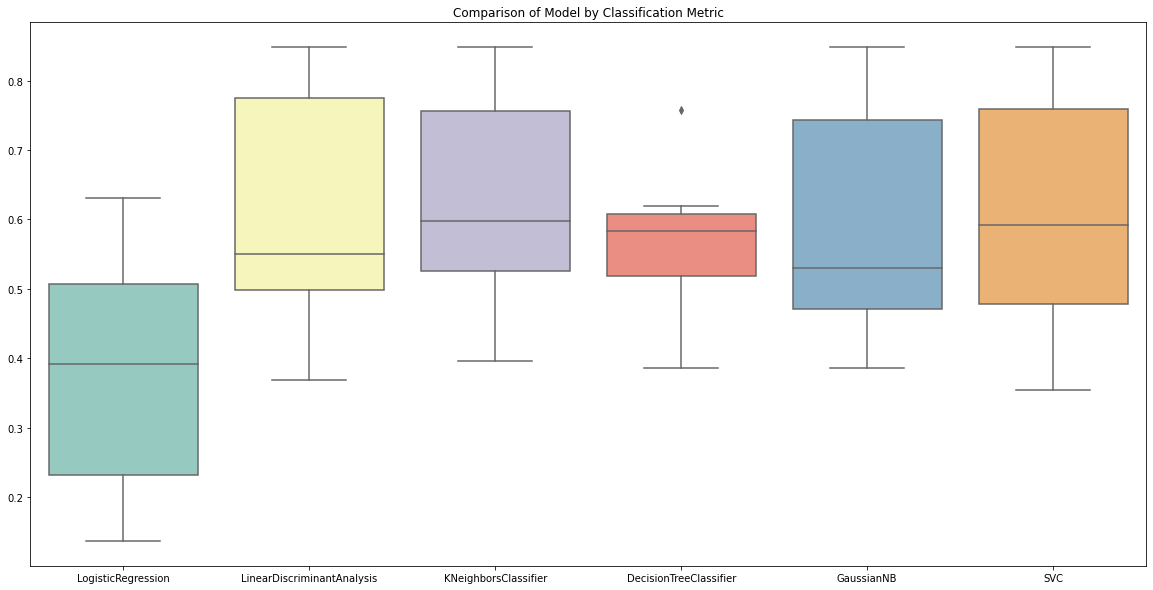

<Figure size 1440x720 with 0 Axes>

In [22]:
# Algorithm Comparison Boxplot

# load dataset
array = train.values
X = array[:,0:8]
Y = array[:,8]

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results)
sns.boxplot(data=results, palette="Set3")
ax.set_xticklabels(names)
plt.title('Comparison of Model by Classification Metric')
plt.show()

plt.savefig('../../../0-data/screenshots/benchmark_models_performance.png',dpi=300)



In [23]:
# example run
# Run             & NDCG    &  AW-H     & AW-A      & CF1-H   & CF1-A   & CAcc   & PErr-H & PErr-A \\
# njit-sub01.text & 0.4632  & -0.4801   & -0.2493   & 0.0792  & 0.1582  & 0.9025 & 0.1524 & 0.2198 \\